# Data analytics project 

- This project is conducted on a student placements dataset
- This data set is taken from kaggle

## Questions on the dataset:

1) Does higher IQ guarantee placement?
2) Does having Internship experience increases your chances of being placed?
3) Does completing projects positively impact your chances of being placed?
4) Does high CGPA correlates to higher placements?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np

#Step 1: 
#Data Wrangling: Get familiar with the data present in the dataset
sp=pd.read_csv(r"downloads/placement.csv")
sp.head()


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [2]:
#Check the number of rows and columns
sp.shape

(10000, 10)

In [3]:
#Check the data types of the categories
sp.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

In [4]:
#Check for null values
sp.isnull().sum()
#There are no missing values so we can now proceed to next step

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [5]:
#Check for duplicates
sp.duplicated().sum()


0

In [6]:
#Now perform Exploratory Data Analysis (EDA)
sp.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


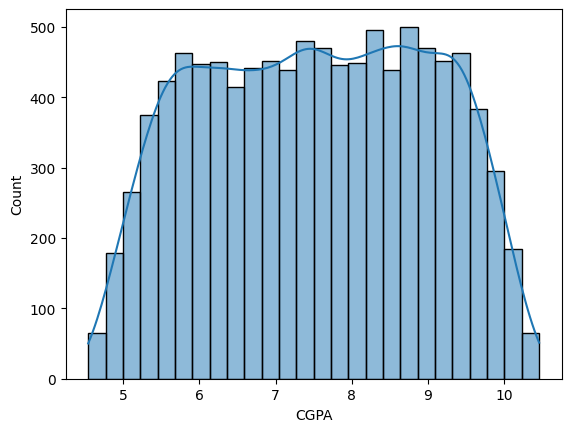

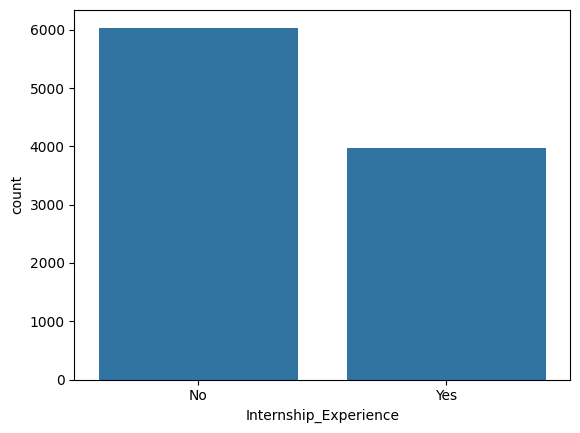

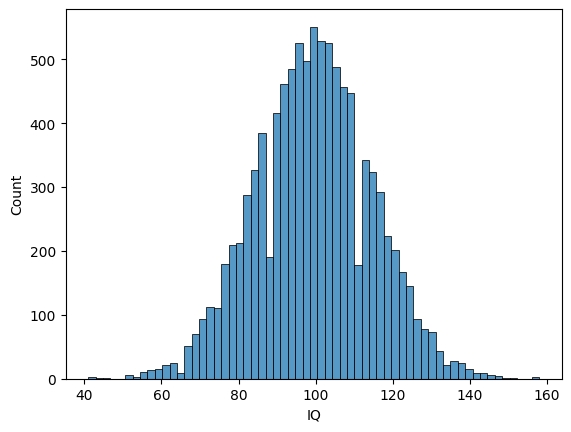

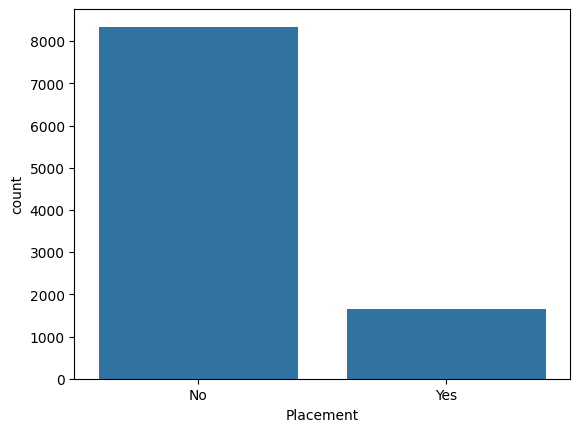

In [7]:
#Distribution of Data in the dataset
sns.histplot(sp['CGPA'],kde=True)
plt.show()
sns.countplot(data=sp,x='Internship_Experience')
plt.show()
sns.histplot(data=sp,x='IQ')
plt.show()
sns.countplot(data=sp,x='Placement')
plt.show()

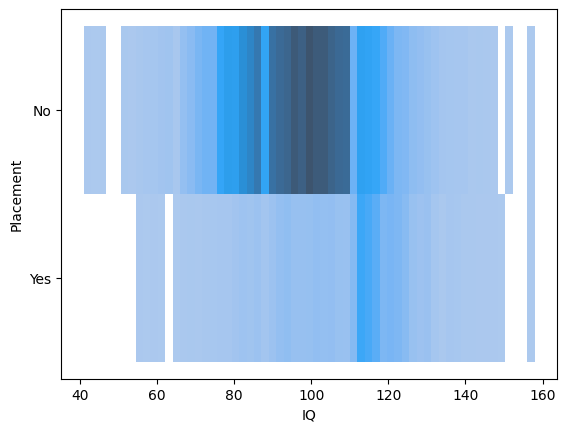

In [8]:
# Q1)Does higher IQ guarantee placement? 
#Lets plot a comparision chart between IQ and Placement to understand the relation
sns.histplot(data=sp,x='IQ',y='Placement')
plt.show()

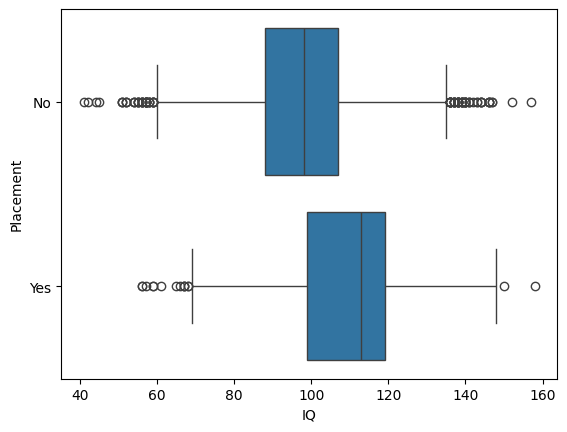

In [9]:
#To understand it thorughly:
sns.boxplot(data=sp,x='IQ',y='Placement')
plt.show()


In [10]:
sp.groupby('Placement')['IQ'].mean()
#Since the Yes column is higher it does not guarantee the corelation. We need to dive in deeper into this scenario

Placement
No      97.552452
Yes    109.121760
Name: IQ, dtype: float64

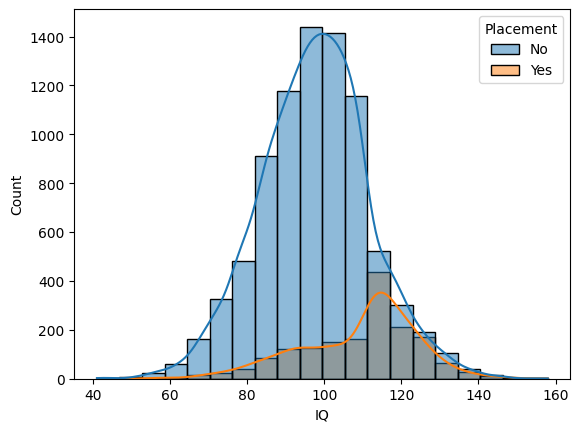

In [11]:
sns.histplot(data=sp,x='IQ',hue='Placement',kde=True,bins=20)
plt.show()

- As you can see from the histplot, we get to know that most of the people have IQ ranging between 90-110 are not placed. But,from the graph we also get to know that people who are placed mostly have an IQ of 110. This means there is an overlap between the two cases.
- This means IQ helps,but its not the deciding factor for placements.
  

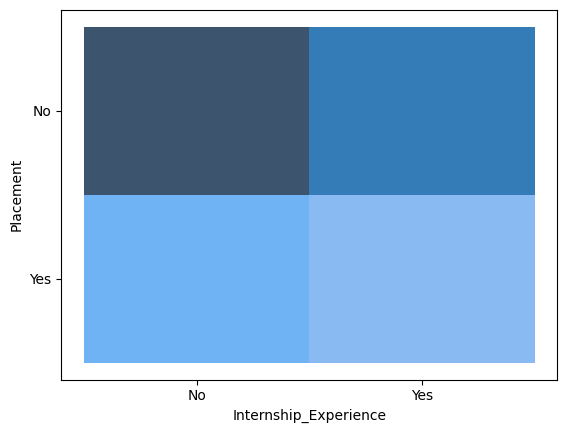

In [12]:
#Question 2: Does having Internship experience increases your chances of being placed?
sns.histplot(data=sp,x='Internship_Experience',y='Placement',kde=True,bins=20)
plt.show()


40% of the students do not have any internship experience. We get this from the histplot graph in the cells above

In [13]:
#This is a contingency table to make it clear about how many students with/without internships are getting placed.
pd.crosstab(sp['Internship_Experience'],sp['Placement'])

Placement,No,Yes
Internship_Experience,,
No,5024,1012
Yes,3317,647


In [14]:
#Calculate the placement rate
#Since both internship and placement are a Yes/No string,we need to convert them into binary
#The group by function is used to group the data using a particular Column name
sp['Placement_Binary']=sp['Placement'].map({'No':0,'Yes':1})
p_rate=sp.groupby('Internship_Experience')['Placement_Binary'].mean()
print(p_rate)

Internship_Experience
No     0.167661
Yes    0.163219
Name: Placement_Binary, dtype: float64


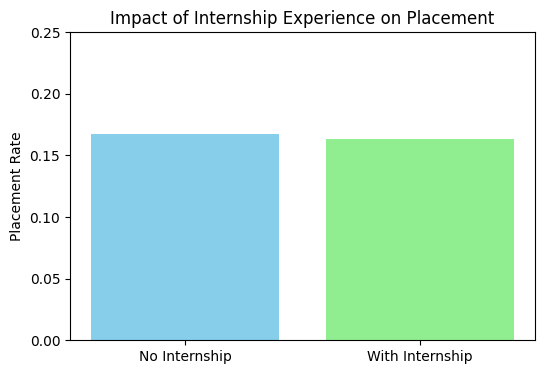

In [15]:
placement_counts = {
    "No Internship": {"Placed": 1012, "Not Placed": 5024},
    "With Internship": {"Placed": 647, "Not Placed": 3317}
}

# Calculate placement rates
labels = list(placement_counts.keys())
rates = [
    placement_counts["No Internship"]["Placed"] / 
    (placement_counts["No Internship"]["Placed"] + placement_counts["No Internship"]["Not Placed"]),
    placement_counts["With Internship"]["Placed"] / 
    (placement_counts["With Internship"]["Placed"] + placement_counts["With Internship"]["Not Placed"])
]

# Plot
plt.figure(figsize=(6,4))
plt.bar(labels, rates, color=['skyblue', 'lightgreen'])
plt.ylabel("Placement Rate")
plt.title("Impact of Internship Experience on Placement")
plt.ylim(0,0.25)
plt.show()

From this dataset, having internship experience did not significantly increase the chances of being placed. In fact, the placement rate is slightly lower for students with internships — but the difference is very small (16.7% vs. 16.3%).

This could mean:

1)The internships may not have been high quality or relevant.

2)Other factors (like CGPA, skills) might play a much bigger role in placement than just internship experience.

3)There may be some data imbalance (look at how many "No internship" students are way more than "Yes").

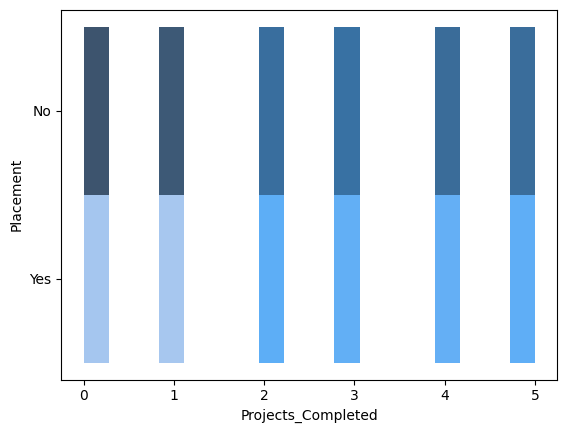

Placement,No,Yes
Projects_Completed,,
0,1643,45
1,1576,33
2,1274,407
3,1238,389
4,1312,381
5,1298,404


In [19]:
# 3)Does completing projects positively impact your chances of being placed?
sns.histplot(data=sp,x='Projects_Completed',y='Placement')
plt.show()
pd.crosstab(sp['Projects_Completed'],sp['Placement'])

- The crosstab gives us a more clear picture about the projects and placement relation
- The number of students who are placed based on projects completed are : 1614
- This means out of 10000 students, only 1614 students are placed if they have completed projects
- This means, only about 16% of students are placed based on their projects


In [21]:
sp.groupby('Placement')['Projects_Completed'].mean()

Placement
No     2.346961
Yes    3.350211
Name: Projects_Completed, dtype: float64

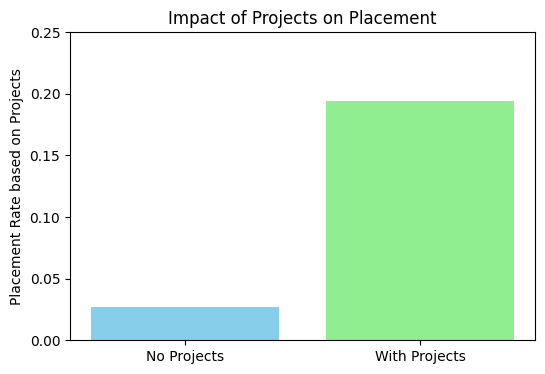

In [24]:
placement_counts = {
    "No Projects": {"Placed":45 , "Not Placed":1643},
    "With Projects": {"Placed": 1614, "Not Placed": 6698}
}

# Calculate placement rates
labels = list(placement_counts.keys())
rates = [
    placement_counts["No Projects"]["Placed"] / 
    (placement_counts["No Projects"]["Placed"] + placement_counts["No Projects"]["Not Placed"]),
    placement_counts["With Projects"]["Placed"] / 
    (placement_counts["With Projects"]["Placed"] + placement_counts["With Projects"]["Not Placed"])
]

# Plot
plt.figure(figsize=(6,4))
plt.bar(labels, rates, color=['skyblue', 'lightgreen'])
plt.ylabel("Placement Rate based on Projects")
plt.title("Impact of Projects on Placement")
plt.ylim(0,0.25)
plt.show()

This graph shows that completing projects has a positive impact on placement

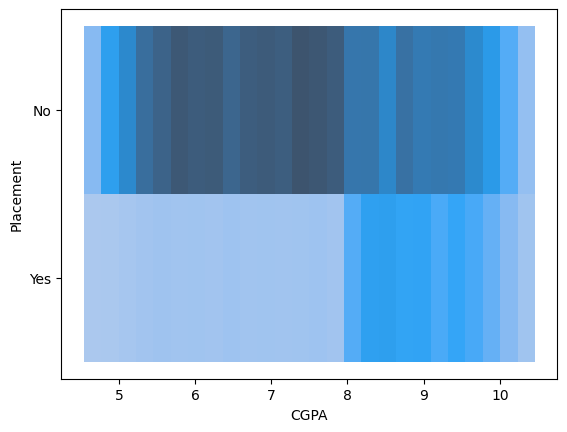

In [25]:
# Does high CGPA correlates to higher placements
sns.histplot(data=sp,x='CGPA',y='Placement')
plt.show()

- From this graph we get to know that most people are in the range of 5.5-8 CGPA
- People who are getting placed on an average have a CGPA of 9
- Students with 8 and above CGPA are being placed

Reference links:

Kaggle : https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset